#### Author: Jens Liebehenschel (2021)
#### Frankfurt University of Applied Sciences, FB2, Computer Science
#### For educational purposes only and not necessarily very pythonic
## Sorting an array using insertion sort and visualize the single steps
#### Based on Cormen et. al.: Introduction to Algorithms
## For execution of complete code click on "Kernel", then on "Restart & Run All"
## At the end of your experiments click on "File", then on "Close and Halt"

In [1]:
def insertion_sort(a):
    global steps, separation_graph_data
    
    # the key to be inserted is stored in an additional element at the end of the array (a[ARRAY_SIZE])
    # rationale: improve understandability of key comparisons and key assignments in output
    a.append(-1)
    
    steps=[]
    separation_graph_data=[]
    # nothing yet sorted
    steps.append([[], [], [[0,len(a)-2]], [], [], a[:]])
    separation_graph_data.append([0,-1])
    # first element is already (and always) partially sorted
    steps.append([[], [[0,0]], [[1,len(a)-2]], [], [], a[:]])
    separation_graph_data.append([1,0])
    
    for j in range(1, len(a)-1):
        a[ARRAY_SIZE] = a[j]
        if output_assigned_elements:
            steps.append([[], [], [], [], [ARRAY_SIZE], a[:]])

        i = j-1
        while i >= 0 and a[i] > a[ARRAY_SIZE]:
            if output_compared_elements:
                steps.append([[], [], [], [i,ARRAY_SIZE], [], a[:]])

            a[i+1] = a[i]
            if output_assigned_elements:
                steps.append([[], [], [], [], [i+1], a[:]])

            i -= 1

        # key comparison check done in last condition check of for-loop?
        if i >= 0 and output_compared_elements:
            steps.append([[], [], [], [i,ARRAY_SIZE], [], a[:]])

        a[i+1] = a[ARRAY_SIZE]
        if output_assigned_elements:
            steps.append([[], [], [], [], [i+1], a[:]])

        separation_graph_data.append([len(steps),j])
        if j < len(a)-2:
            steps.append([[], [[0,j]], [[j+1,len(a)-2]], [], [], a[:]])
        else: # last loop: all elements sorted
            steps.append([[[0,j]], [], [[j+1,len(a)-2]], [], [], a[:]])
    
    return a[:-1] # do not include additional space for key in returned array, so remove last element

## Constants

In [2]:
# change output colors here
COL_SORTED = 'mediumseagreen'
COL_PART_SORTED = 'yellowgreen'
COL_UNSORTED = 'tomato'
COL_COMPARISON = 'skyblue'
COL_ASSIGNMENT = 'sandybrown'
COL_SEP_GRAPH = 'bo-' # includes also style
COL_HORIZ_LINES = 'lightgray'
COL_LAST_HORIZ_LINE = 'k'

# offset for matching array index and y-axis description in output
OFFSET = 0.5

# Some output text
TEXT_BEFORE_SORTING = "Before sorting:"
TEXT_AFTER_SORTING = "After  sorting:"

## Helper functions

In [3]:
def plot_values(x, y_vals, a):
    for y in y_vals:
        plt.text(x, y, a[y], verticalalignment='center_baseline', horizontalalignment='center', fontsize=14)

def plot_interval(x, y_vals, col, thick_lines = True):
    if len(y_vals) == 1 and len(y_vals[0]) == 2:
        if thick_lines:
            plt.plot([x,x],[y_vals[0][0]-OFFSET, y_vals[0][1]+OFFSET], col, linewidth=8, solid_capstyle="butt")
        else:
            plt.plot([x,x],[y_vals[0][0]-OFFSET, y_vals[0][1]+OFFSET], col)

## Output graphical view

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 12]

def output_graphical_view(ARRAY_SIZE):
    global steps, separation_graph_data

    # format graph
    plt.xticks(range(0, len(steps)+1, max(1,len(steps)//10)), fontsize=14)
    plt.yticks(range(0, ARRAY_SIZE+1, max(1,ARRAY_SIZE//10)), fontsize=14)
    plt.axis([-1, len(steps),-1, ARRAY_SIZE+1])
    #plt.axis('off')
    plt.xlabel("Sorting steps")
    plt.ylabel("Indexes of array to be sorted")

    # output graph based on collected data
    for i, step in enumerate(steps):
        if len(step[3]) == 0 and len(step[4]) == 0:
            # sorted
            plot_interval(i, step[0], COL_SORTED)
            # partially sorted
            plot_interval(i, step[1], COL_PART_SORTED)
            # unsorted
            plot_interval(i, step[2], COL_UNSORTED)
            # plot complete array content
            plot_values(i,list(range(ARRAY_SIZE)),step[5])

        elif output_compared_elements and len(step[3]) > 0:
            minimum = min(step[3])
            maximum = max(step[3])
            # compared elements
            plot_interval(i, [[minimum, minimum]], COL_COMPARISON)
            plot_interval(i, [[maximum, maximum]], COL_COMPARISON)
            # line between both elements
            if maximum-minimum > 1:
                plot_interval(i, [[minimum+1, maximum-1]], COL_COMPARISON, thick_lines = False)
            # compared keys
            plot_values(i,[minimum,maximum],step[5])

        elif output_assigned_elements and len(step[4]) > 0:
            minimum = min(step[4])
            maximum = max(step[4])
            # assigned elements
            plot_interval(i, [[minimum, minimum]], COL_ASSIGNMENT)
            plot_interval(i, [[maximum, maximum]], COL_ASSIGNMENT)
            # line between both elements
            if maximum-minimum > 1:
                plot_interval(i, [[minimum+1, maximum-1]], COL_ASSIGNMENT, thick_lines = False)
            # assigned keys
            plot_values(i,[minimum, maximum],step[5])
        
    if plot_separation_graph:
        for i in range(len(separation_graph_data)-1):
            plt.plot([separation_graph_data[i][0], separation_graph_data[i+1][0]],
                     [separation_graph_data[i][1]+OFFSET, separation_graph_data[i+1][1]+OFFSET], COL_SEP_GRAPH)

    # draw horitontal lines
    for i in range(ARRAY_SIZE):
        plt.hlines(xmin=-1, xmax=len(steps), y=i-OFFSET, color=COL_HORIZ_LINES)
    plt.hlines(xmin=-1, xmax=len(steps), y=ARRAY_SIZE-OFFSET, color=COL_LAST_HORIZ_LINE)

    # show plot
    plt.show()

## Global variables for easier information exchange between sorting and output functions

In [5]:
# steps contains the data for visualization of the single steps
# steps: [[sorted interval], [partially sorted interval], [unsorted interval], 
#         [compared elements], [assigned elements], [array]]
# [sorted, partially sorted, unsorted]: [from,to], ... (with from <= to)
# [compared elements]: two indexes in a list
# [exchanged elements]: one (key assignment) or two indexes (key exchange) in a list
# [array]: copy of array in current state
steps=[]

# separation_graph_data contains the values for line showing sorted, partially sorted and unsorted parts
separation_graph_data=[]

## Configuration data for elements in output 

In [6]:
# change output settings here
plot_separation_graph = False
plot_separation_graph = True
output_compared_elements = False
output_compared_elements = True
output_assigned_elements = False
output_assigned_elements = True

## Size of predefined sorting tests

In [7]:
# The size of elements in tests can be changed here
ARRAY_SIZE = 10

## Legend for output

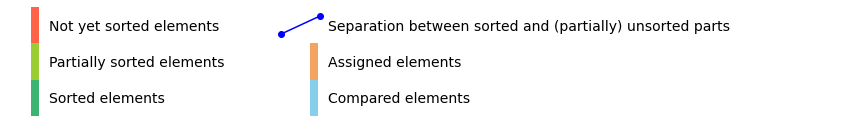

In [8]:
COLORS = [[COL_SORTED,"Sorted elements"], [COL_PART_SORTED,"Partially sorted elements"], [COL_UNSORTED,"Not yet sorted elements"],
          [COL_COMPARISON,"Compared elements"], [COL_ASSIGNMENT,"Assigned elements"], 
          [COL_SEP_GRAPH,"Separation between sorted and (partially) unsorted parts"]]
plt.figure(figsize=(15, 2))
plt.axis([0, 30, 0, 3])
plt.axis('off')
for i in range(3):
    plot_interval(1, [[i+OFFSET,i+OFFSET]], COLORS[i][0])
    plt.text(1+OFFSET, i+OFFSET, COLORS[i][1], verticalalignment='center_baseline', horizontalalignment='left', fontsize=14)
for i in range(2):
    plot_interval(11, [[i+OFFSET,i+OFFSET]], COLORS[i+3][0])
    plt.text(11+OFFSET, i+OFFSET, COLORS[i+3][1], verticalalignment='center_baseline', horizontalalignment='left', fontsize=14)
plt.plot([9.8,11.2], [2.25,2.75], COLORS[5][0])
plt.text(11+OFFSET, 2+OFFSET, COLORS[5][1], verticalalignment='center_baseline', horizontalalignment='left', fontsize=14)
plt.show()

## Generate test data and test sorting algorithm

Before sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


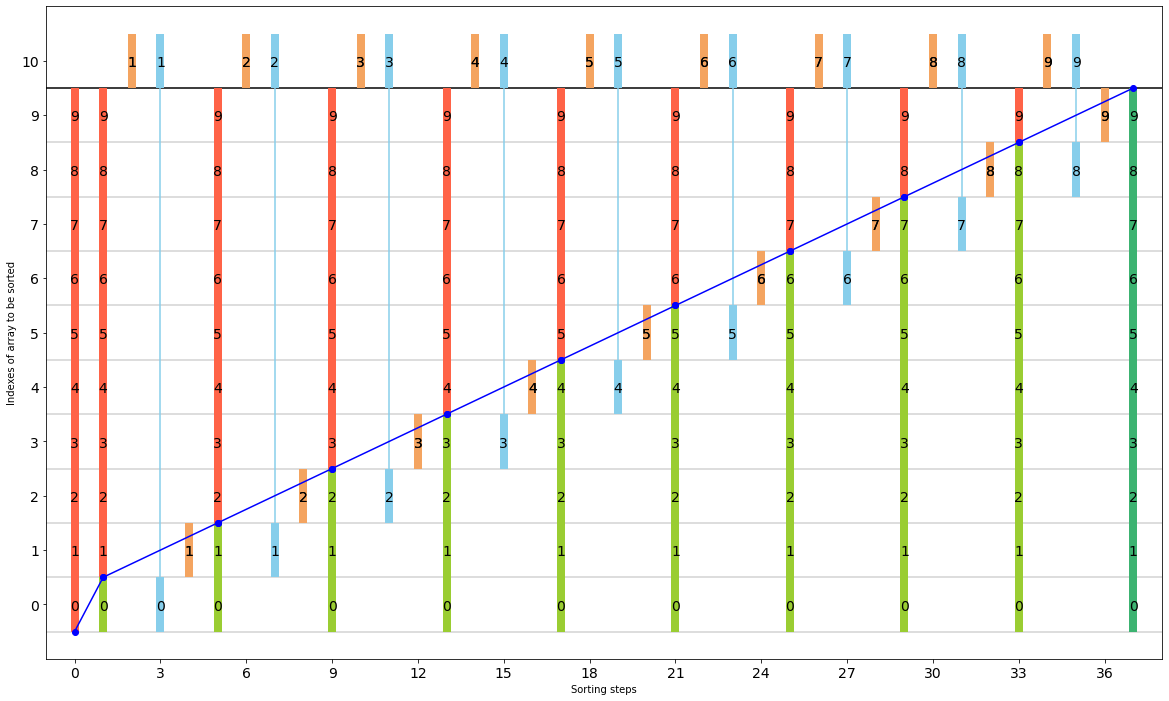

In [9]:
# test sorting sorted array
sorted_array = list(range(ARRAY_SIZE))
print(TEXT_BEFORE_SORTING, sorted_array)
print(TEXT_AFTER_SORTING, insertion_sort(sorted_array))
output_graphical_view(ARRAY_SIZE)

Before sorting: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


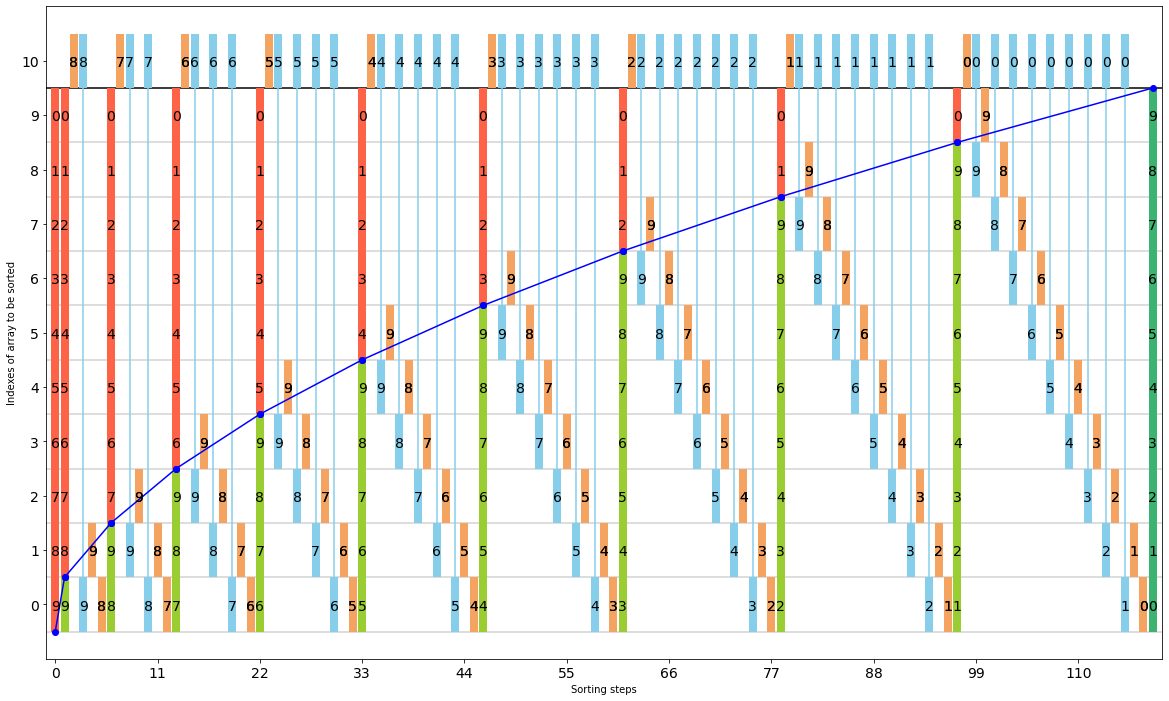

In [10]:
# test sorting reversly sorted array
reverse_sorted_array = list(range(ARRAY_SIZE-1, -1, -1))
print(TEXT_BEFORE_SORTING, reverse_sorted_array)
print(TEXT_AFTER_SORTING, insertion_sort(reverse_sorted_array))
output_graphical_view(ARRAY_SIZE)

Before sorting: [2, 8, 4, 9, 1, 6, 7, 3, 0, 5]
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


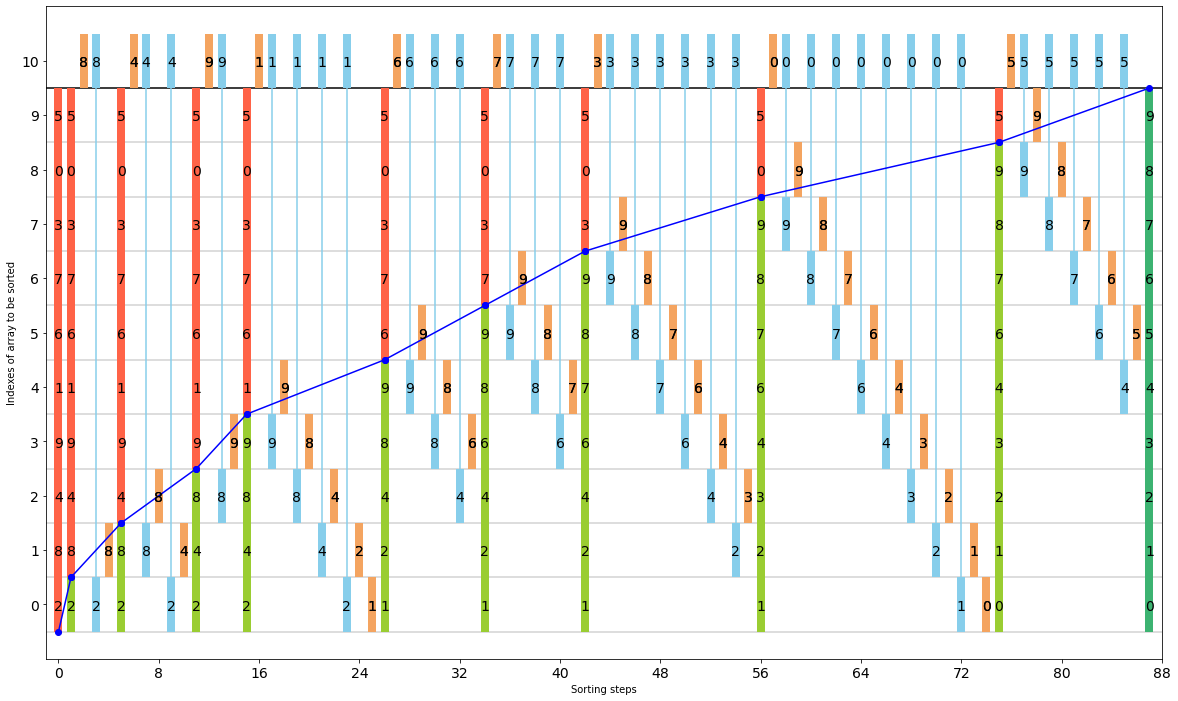

In [11]:
# test sorting random array
# use numpy for generating a permutation
import numpy
# initialialize random number generator to obtain reproducable results
# other values might be used or even no initialization done here
numpy.random.seed(0)
# now generate random data and test sorting
array = list(numpy.random.permutation(ARRAY_SIZE))
print(TEXT_BEFORE_SORTING, array)
print(TEXT_AFTER_SORTING, insertion_sort(array))
output_graphical_view(ARRAY_SIZE)

Before sorting: [1, 3, 2, 0]
After  sorting: [0, 1, 2, 3]


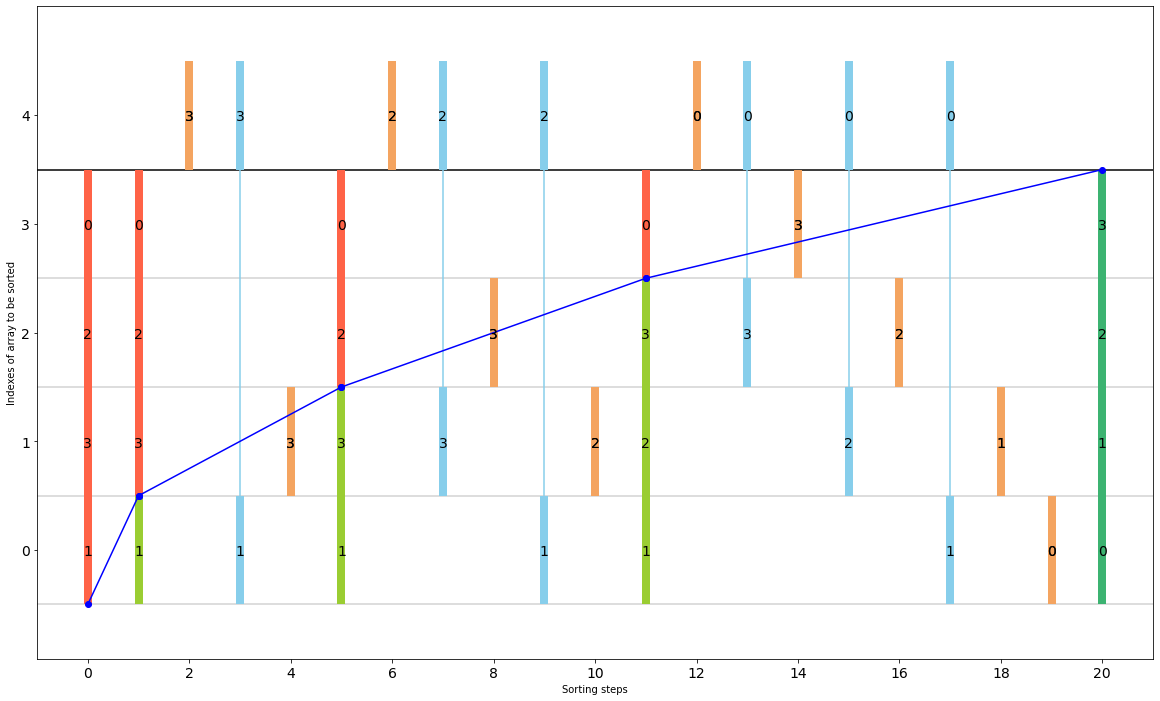

In [12]:
# your test here ...
array = [1,3,2,0]
ARRAY_SIZE = len(array)
print(TEXT_BEFORE_SORTING, array)
print(TEXT_AFTER_SORTING, insertion_sort(array))
output_graphical_view(ARRAY_SIZE)

In [13]:
# ... and here ...
